# **Import Libraries**

We import the The Natural Language Toolkit (NLTK) library, which is widely used for natural language processing (NLP) tasks.

In [100]:
# Import necessary libraries
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\msi\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

# **Load the IMDB Dataset**

We load the movie reviews dataset from NLTK. Each review is stored in a list, and we label them as positive (pos) or negative (neg) based on the filename.

In [101]:
# Import necessary libraries
import pandas as pd
from nltk.corpus import movie_reviews

# Load the dataset
reviews = []
labels = []

# Extract reviews and their corresponding sentiments (pos/neg)
for fileid in movie_reviews.fileids():
    reviews.append(movie_reviews.raw(fileid))
    labels.append(fileid.split('/')[0])  # 'pos' or 'neg' is part of the file name

# Create a DataFrame
df = pd.DataFrame({
    'review': reviews,
    'sentiment': labels
})

# Show the first few rows of the dataset
df.head()

,review,sentiment
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


In [102]:
df.to_csv('data/data.csv')

In [3]:
df.sentiment.value_counts()

sentiment
neg    1000
pos    1000
Name: count, dtype: int64

# **Data Cleaning**

Converting all text to lowercase to ensure uniformity and reduce the complexity of the analysis.

In [4]:
import re

def clean_text(text):
    # Lowercasing
    text = text.lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply the cleaning function
df['cleaned_review'] = df['review'].apply(clean_text)

# Check the cleaned data
df[['review', 'cleaned_review']].head()


,review,cleaned_review
0,"plot : two teen couples go to a church party ,...",plot two teen couples go to a church party dri...
1,the happy bastard's quick movie review \ndamn ...,the happy bastards quick movie review damn tha...
2,it is movies like these that make a jaded movi...,it is movies like these that make a jaded movi...
3,""" quest for camelot "" is warner bros . ' firs...",quest for camelot is warner bros first featur...
4,synopsis : a mentally unstable man undergoing ...,synopsis a mentally unstable man undergoing ps...


# Removing Stopwords (except negations) 

In [5]:
import spacy

# Charger le modèle de langue anglais
nlp = spacy.load("en_core_web_sm")

# Récupérer la liste des stop words
stop_words_spacy = nlp.Defaults.stop_words

In [6]:
len(stop_words_spacy)

326

In [7]:
from nltk.corpus    import stopwords
stop_words_nltk = set(stopwords.words('english'))

In [8]:
len(stop_words_nltk)

179

#### We will use the predefined STOPWORDS by Spacy , because it contains more words than NLTK

In [9]:
def remove_stopwords(text):
    tokens = text.split() 
    filtered_tokens = [word for word in tokens if word not in stop_words_spacy]  
    return ' '.join(filtered_tokens)  

df['cleaned_review'] = df['cleaned_review'].apply(remove_stopwords)

df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,"plot : two teen couples go to a church party ,...",plot teen couples church party drink drive acc...
1,the happy bastard's quick movie review \ndamn ...,happy bastards quick movie review damn yk bug ...
2,it is movies like these that make a jaded movi...,movies like jaded movie viewer thankful invent...
3,""" quest for camelot "" is warner bros . ' firs...",quest camelot warner bros featurelength fullya...
4,synopsis : a mentally unstable man undergoing ...,synopsis mentally unstable man undergoing psyc...


# **Tokenization**

 This step splits the cleaned text into individual words (tokens). Tokenization is essential because it allows us to analyze the text at a granular level.

In [10]:
import pandas as pd
import spacy
from tqdm import tqdm  # Import tqdm for progress tracking

# Load the SpaCy language model
nlp = spacy.load('en_core_web_sm')

# Function for tokenization
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Assume df is your DataFrame and has a 'cleaned_review' column
# If you want to track progress in a Jupyter notebook, you can use tqdm
tqdm.pandas()

# Apply tokenization to cleaned reviews
df['tokens'] = df['cleaned_review'].progress_apply(tokenize_text)

# Check the tokenized data
df[['cleaned_review', 'tokens']].head()

100%|██████████| 2000/2000 [00:53<00:00, 37.16it/s]


,cleaned_review,tokens
0,plot teen couples church party drink drive acc...,"[plot, teen, couples, church, party, drink, dr..."
1,happy bastards quick movie review damn yk bug ...,"[happy, bastards, quick, movie, review, damn, ..."
2,movies like jaded movie viewer thankful invent...,"[movies, like, jaded, movie, viewer, thankful,..."
3,quest camelot warner bros featurelength fullya...,"[quest, camelot, warner, bros, featurelength, ..."
4,synopsis mentally unstable man undergoing psyc...,"[synopsis, mentally, unstable, man, undergoing..."


In [11]:
df.cleaned_review.iloc[0]

'plot teen couples church party drink drive accident guys dies girlfriend continues life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review harder write generally applaud films attempt break mold mess head lost highway memento good bad ways making types films folks didnt snag correctly taken pretty neat concept executed terribly problems movie main problem simply jumbled starts normal downshifts fantasy world audience member idea whats going dreams characters coming dead look like dead strange apparitions disappearances looooot chase scenes tons weird things happen simply explained personally dont mind trying unravel film clue kind fed films biggest problem obviously got big secret hide want hide completely final minutes things entertaining thrilling engaging meantime sad arrow dig flicks like actually figured halfway point strangeness start little bit sense didnt film entertaining guess line movies l

In [12]:
df['tokens'].head()

0    [plot, teen, couples, church, party, drink, dr...
1    [happy, bastards, quick, movie, review, damn, ...
2    [movies, like, jaded, movie, viewer, thankful,...
3    [quest, camelot, warner, bros, featurelength, ...
4    [synopsis, mentally, unstable, man, undergoing...
Name: tokens, dtype: object

# Stemming

In [13]:
import pandas as pd
from nltk.stem import PorterStemmer
from tqdm import tqdm  

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Apply stemming to the tokens
df['stemmed_tokens'] = df['tokens'].progress_apply(stem_tokens)

# Display the results
df[['tokens', 'stemmed_tokens']].head()

100%|██████████| 2000/2000 [00:07<00:00, 281.76it/s]


,tokens,stemmed_tokens
0,"[plot, teen, couples, church, party, drink, dr...","[plot, teen, coupl, church, parti, drink, driv..."
1,"[happy, bastards, quick, movie, review, damn, ...","[happi, bastard, quick, movi, review, damn, yk..."
2,"[movies, like, jaded, movie, viewer, thankful,...","[movi, like, jade, movi, viewer, thank, invent..."
3,"[quest, camelot, warner, bros, featurelength, ...","[quest, camelot, warner, bro, featurelength, f..."
4,"[synopsis, mentally, unstable, man, undergoing...","[synopsi, mental, unstabl, man, undergo, psych..."


# **Lemmatization**

This step reduces words to their base form (lemma) while considering the context provided by the POS tag (e.g., "running" becomes "run"). This is more sophisticated than stemming because it aims for a proper dictionary form of the word.

In [14]:
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  
    return [token.lemma_ for token in doc]

# Apply lemmatization to the filtered tokens
df['lemmatized_tokens'] = df['tokens'].progress_apply(lemmatize_tokens)

print(df[['tokens', 'lemmatized_tokens']].head())

100%|██████████| 2000/2000 [00:49<00:00, 40.55it/s]

                                              tokens  \
0  [plot, teen, couples, church, party, drink, dr...   
1  [happy, bastards, quick, movie, review, damn, ...   
2  [movies, like, jaded, movie, viewer, thankful,...   
3  [quest, camelot, warner, bros, featurelength, ...   
4  [synopsis, mentally, unstable, man, undergoing...   

                                   lemmatized_tokens  
0  [plot, teen, couple, church, party, drink, dri...  
1  [happy, bastard, quick, movie, review, damn, y...  
2  [movie, like, jade, movie, viewer, thankful, i...  
3  [quest, camelot, warner, bros, featurelength, ...  
4  [synopsis, mentally, unstable, man, undergo, p...  


In [15]:
df[['tokens', 'lemmatized_tokens']].head()

,tokens,lemmatized_tokens
0,"[plot, teen, couples, church, party, drink, dr...","[plot, teen, couple, church, party, drink, dri..."
1,"[happy, bastards, quick, movie, review, damn, ...","[happy, bastard, quick, movie, review, damn, y..."
2,"[movies, like, jaded, movie, viewer, thankful,...","[movie, like, jade, movie, viewer, thankful, i..."
3,"[quest, camelot, warner, bros, featurelength, ...","[quest, camelot, warner, bros, featurelength, ..."
4,"[synopsis, mentally, unstable, man, undergoing...","[synopsis, mentally, unstable, man, undergo, p..."


# **POS Tagging**

 This step assigns part-of-speech tags to the lemmatized tokens, providing information about the grammatical role of each word in the context of the sentence.

In [16]:
def pos_tagging(tokens):
    doc = nlp(" ".join(tokens))  # Join tokens back to string for processing
    return [(token.text, token.lemma_, token.pos_) for token in doc]

df['pos_tags'] = df['lemmatized_tokens'].progress_apply(pos_tagging)

df[['pos_tags']].head()

100%|██████████| 2000/2000 [00:50<00:00, 39.58it/s]


,pos_tags
0,"[(plot, plot, NOUN), (teen, teen, NOUN), (coup..."
1,"[(happy, happy, ADJ), (bastard, bastard, NOUN)..."
2,"[(movie, movie, NOUN), (like, like, ADP), (jad..."
3,"[(quest, quest, PROPN), (camelot, camelot, PRO..."
4,"[(synopsis, synopsis, NOUN), (mentally, mental..."


In [19]:
def pos_tagging_and_filter(tokens):
    # Apply POS tagging
    doc=nlp(' '.join(tokens))

    # Filter only nouns and verbs
    filtered_tokens = [token for token in doc if token.pos_ == 'NN' or token.pos_ == 'ADJ' or token.pos_ == 'VERB']

    return filtered_tokens

# Apply POS tagging and filtering to lemmatized tokens
df['filtered_tokens'] = df['lemmatized_tokens'].apply(pos_tagging_and_filter)

# Check the filtered data (verbs and nouns only)
df[['lemmatized_tokens', 'filtered_tokens']].head()

,lemmatized_tokens,filtered_tokens
0,"[plot, teen, couple, church, party, drink, dri...","[die, continue, nightmare, s, find, touch, coo..."
1,"[happy, bastard, quick, movie, review, damn, y...","[happy, quick, get, start, tugboat, come, dese..."
2,"[movie, like, jade, movie, viewer, thankful, i...","[thankful, tell, employ, undercover, wrong, st..."
3,"[quest, camelot, warner, bros, featurelength, ...","[steal, recent, cast, colorful, beat, come, go..."
4,"[synopsis, mentally, unstable, man, undergo, p...","[unstable, undergo, fatal, attempt, gain, take..."


# **Word Embedding**

## **TF-IDF**

In [37]:
def filter_text(sequence):
    s=[]
    for token in sequence :
        s.append(str(token))
    return ' '.join(s)

In [ ]:
df[['sentiment', 'filtered_text']].to_csv('data/preprocessed_data.csv')

 We initialize the TfidfVectorizer from Scikit-learn and fit it to the cleaned reviews. TF-IDF is used to convert the text data into a numerical format, reflecting the importance of each term in the context of the entire dataset.

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['filtered_text'] = df['filtered_tokens'].apply(filter_text)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity

# Fit and transform the cleaned reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(df['filtered_text'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())





## **FastText**

We prepare the data in a format suitable for FastText and train the FastText model. FastText considers subword information, making it effective for morphologically rich languages and out-of-vocabulary words.

In [107]:
import fasttext
import numpy as np

df=pd.read_csv('data/preprocessed_data.csv',index_col=0)
df['filtered_text'].to_csv('corpus.txt',header=False)
# Entraînement d'un modèle FastText sur votre propre corpus
fasttext_model = fasttext.train_unsupervised('corpus.txt', model='skipgram')

# Fonction pour obtenir l'embedding d'une phrase
def get_sentence_embedding(sentence, model):
    words = sentence.split()  # Tokenisation simple
    word_vectors = [fasttext_model.get_word_vector(word) for word in words if word in fasttext_model]
    
    if len(word_vectors) == 0:
        return np.zeros(fasttext_model.get_dimension())  # Retourner un vecteur nul si aucun mot n'est trouvé
    return np.mean(word_vectors, axis=0)  # Moyenne des embeddings pour la phrase

# Charger votre DataFrame (assurez-vous que 'filtered_text' est la colonne de texte)


# Calculer les embeddings de chaque phrase et les ajouter comme une nouvelle colonne
df['sentence_embedding'] = df['filtered_text'].apply(lambda x: get_sentence_embedding(x, fasttext_model))

# Exemple de contenu du DataFrame après l'ajout de l'embedding
df.head()

,sentiment,filtered_text,sentence_embedding
0,neg,die continue nightmare s find touch cool prese...,"[-0.1114065, -0.18956636, -0.013039182, -0.095..."
1,neg,happy quick get start tugboat come deserted ru...,"[-0.11111246, -0.20685868, -0.01965093, -0.094..."
2,neg,thankful tell employ undercover wrong steal qu...,"[-0.11836663, -0.18973967, -0.0038995314, -0.1..."
3,neg,steal recent cast colorful beat come good dead...,"[-0.11764066, -0.18240635, -0.0067705964, -0.0..."
4,neg,unstable undergo fatal attempt gain take kill ...,"[-0.11568695, -0.17534785, -0.004221192, -0.09..."


### SBERT :

In [113]:
from sentence_transformers import SentenceTransformer

# Charger le modèle SBERT
embedding = SentenceTransformer('all-MiniLM-L6-v2')

In [114]:
df['SBERT'] = df['filtered_text'].apply(lambda x: embedding.encode(x))

In [115]:
df.head()

,sentiment,filtered_text,sentence_embedding,SBERT
0,neg,die continue nightmare s find touch cool prese...,"[-0.1114065, -0.18956636, -0.013039182, -0.095...","[0.021407606, -0.084070146, 0.060046904, 0.001..."
1,neg,happy quick get start tugboat come deserted ru...,"[-0.11111246, -0.20685868, -0.01965093, -0.094...","[-0.05555948, -0.028392768, 0.05569559, 0.0244..."
2,neg,thankful tell employ undercover wrong steal qu...,"[-0.11836663, -0.18973967, -0.0038995314, -0.1...","[-0.0770346, -0.01919024, 0.06839841, -0.02606..."
3,neg,steal recent cast colorful beat come good dead...,"[-0.11764066, -0.18240635, -0.0067705964, -0.0...","[-0.06858337, -0.016195001, 0.02190971, -0.050..."
4,neg,unstable undergo fatal attempt gain take kill ...,"[-0.11568695, -0.17534785, -0.004221192, -0.09...","[0.055572182, -0.052183226, -0.0023587106, -0...."


## Modeling

In [116]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# TF-IDF feature matrix
X_tfidf = tfidf_matrix
X_fasttext = np.array(df['sentence_embedding'].tolist())
X_SBERT = np.array(df['SBERT'].tolist())
y = label_encoder.fit_transform(df['sentiment'])  # Assuming 'label' contains the sentiment (0 or 1)





### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

def train_and_evaluate(X, y):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

# Evaluate each feature extraction method
results = {}

# TF-IDF
results['TF-IDF'] = train_and_evaluate(X_tfidf, y)

results['SBERT'] = train_and_evaluate(X_SBERT, y)


# FastText
results['FastText'] = train_and_evaluate(X_fasttext, y)


In [118]:
for method, (accuracy, report) in results.items():
    print(f"Method: {method}\nAccuracy: {accuracy}\nClassification Report:\n{report}\n")


Method: TF-IDF
Accuracy: 0.8125
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       199
           1       0.80      0.83      0.82       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400


Method: SBERT
Accuracy: 0.7225
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       199
           1       0.71      0.75      0.73       201

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400


Method: FastText
Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63       199
           1       0.63      0.63      0.63       201

    accuracy    

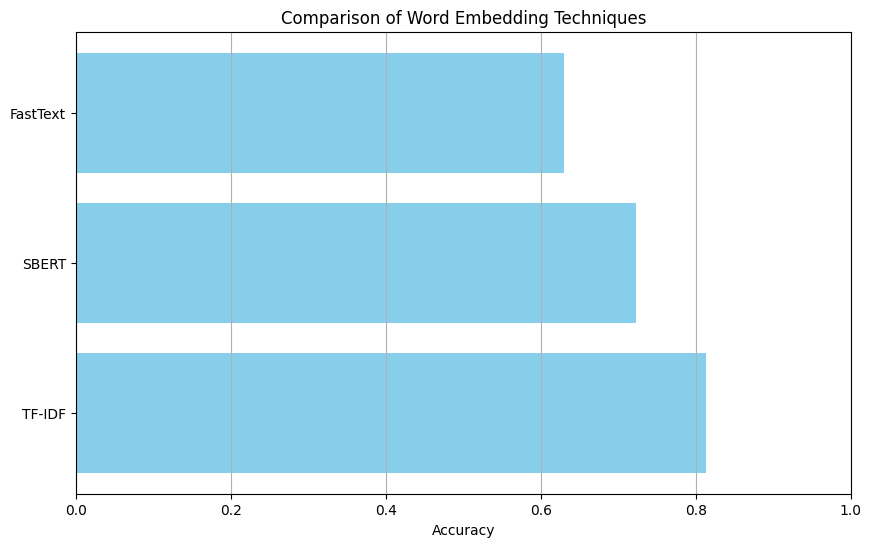

In [119]:
import matplotlib.pyplot as plt

# Prepare data for plotting
methods = list(results.keys())
accuracies = [result[0] for result in results.values()]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(methods, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Word Embedding Techniques')
plt.xlim(0, 1)  # Set limits to 0-1 for better visibility
plt.grid(axis='x')
plt.show()


### LSTM :

In [149]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np


# 1. Nettoyage et prétraitement du texte
# Tu peux appliquer ici des étapes de nettoyage comme la suppression de la ponctuation, la conversion en minuscules, etc.

# 2. Tokenisation
texts=list(df['filtered_text'])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
labels=label_encoder.fit_transform(df['sentiment'])

In [150]:
# 3. Padding
# Ajuster la longueur des séquences pour qu'elles soient de la même longueur
X = pad_sequences(sequences, padding='post')  # Ajout de zéros à la fin pour compléter les séquences
# 4. Diviser les données en entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
# Afficher le résultat
print("Séquences avec padding :")
print(X_train)

Séquences avec padding :
[[   41   238  3403 ...     0     0     0]
 [ 7746    33   169 ...     0     0     0]
 [ 3718     7     4 ...     0     0     0]
 ...
 [  198   171     3 ...     0     0     0]
 [11447     8   132 ...     0     0     0]
 [ 4784     1   589 ...     0     0     0]]


In [152]:
# Ensuite, tu peux définir ton modèle LSTM comme suit :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout

model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_train.shape[1]),  # Embedding des mots
    LSTM(128, return_sequences=False),  # LSTM
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Classification binaire
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.4651 - loss: 0.6955 - val_accuracy: 0.5025 - val_loss: 0.6937
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.4802 - loss: 0.6950 - val_accuracy: 0.5025 - val_loss: 0.6931
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5153 - loss: 0.6934 - val_accuracy: 0.4975 - val_loss: 0.6936
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.4815 - loss: 0.6938 - val_accuracy: 0.4975 - val_loss: 0.6932
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.4892 - loss: 0.6942 - val_accuracy: 0.4975 - val_loss: 0.6934
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.5100 - loss: 0.6933 - val_accuracy: 0.4975 - val_loss: 0.6934
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4870 - loss: 0.6944 - val_accuracy: 0.5025 - val_loss: 0.6938
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4958 - loss: 0.6939 - val_accuracy: 0.49

In [ ]:
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X_train.shape[1]),  # Embedding des mots
    LSTM(128, return_sequences=False),  # LSTM
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Classification binaire
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

In [155]:
X_train.shape[1]

356

In [162]:
len(tfidf_vectorizer.vocabulary_)

5000